# Data Wrangling project for DAND
This project consists of:

### `1.` Data wrangling
- Gathering Data 
- Assessing Data 
- Cleaning Data

### `2.` Storing, analyzing, and visualizing wrangled data

### `3.` Reporting 
- Data wrangling efforts 
- Data analyses and visualizations

In [1]:
# import libraries
import pandas as pd
import numpy as np
import requests
import os
from PIL import Image
from io import BytesIO
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Gathering Data

`1.`The WeRateDogs Twitter archive. Our instructor David, is giving this file to us, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv in your classroom data

`2.`The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

`3.`Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

## This is the First Resource we are using

We just read a .csv file into a dataframe as we have always been doing

In [ ]:
#Gather data from the csv file from David, fo which he did not really tell us what's in there, what we are expected to see
#He used twitter .json data from twitter downloaded using the API 
archive = pd.read_csv('twitter-archive-enhanced.csv')

## This is the Second Resource we are using
In this section we use requests library

In [ ]:
# Create directory if it doesn't already exist that will keep the image-predictions.tsv file downloaded
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
#use requests to download file in the folder_name previously created
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [ ]:
#read the tsv file into a dataframe
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
image_predictions.head()

In [ ]:
# This is the way to download and save the file in the folder we have created namely the folder image_predictions 
# Gather data from source 2 : Download using the URL from web. We will be downloading a .tsv file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

img_pred = pd.read_csv('image-predictions.tsv',delimiter='\t')

Here we follow a process to download and collect all pictures from tweets 

In [ ]:
#create folder for twitter images downloaded
folder_pics = 'pictures'

#make directory if it doesn't already exist
if not os.path.exists(folder_pics):
    os.makedirs(folder_pics)

In [ ]:
#download all images from urls - this takes some time
'''
tweet_images = []
for index,row in image_predictions.iterrows():
    try:
        image = requests.get(row['jpg_url'])
        i = Image.open(BytesIO(image.content))
        image_file_format = row['jpg_url'].split('.')[-1]
        i.save(folder_name_2 + '/' + str(row['tweet_id']) + '.' + image_file_format)
    except Exception as e:
        print(str(row['tweet_id']) + ': ' + str(e))
        
#675781562965868544: cannot identify image file <_io.BytesIO object at 0x000001B03CD80288>
#837012587749474308: cannot identify image file <_io.BytesIO object at 0x000001B039579FA8>
'''

## This is the Third Resource we are using
In this section we use json and tweepy libraries

> The JSON library has two main methods:
- `dumps`-- Takes in a Python object, and converts it to a string
- `loads` -- Takes a JSON string, and converts it to a Python object (Source: www.dataquest.io)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
'''
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
'''

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
'''
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile) #we use dump METHOD: takes a python object and converts it into a string
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

>For students that may not have their twitter developer account activated - and this can be the case for a number of reasons -, they can complete this project by downloading the `tweet-json.txt` file they find in the classroom, provided as aditional material in the end of the section `Wrangle an Analyse Data`, `4. Twitter API`.
>In that case it could be you encounter an error trying to read `tweet-jason.txt` file `ValueError: Extra data`. Please refer to the following link in order to better understand how this error has been handled below.
https://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data/51830719

In [ ]:
# reading json data from file NOT yet creating a dataframe - This is done later on
#with open('tweet-json.txt',mode='r') as read_file:
#    json_data = json.load(read_file)
json_data = [json.loads(line) for line in open('tweet-json.txt', 'r')] #reads json_data in a list

In [ ]:
#similarly you can do the same thing in the following way
json_data = [] 
for line in open('tweet-json.txt', 'r'): 
    tweets_json.append(json.loads(line))
'''
#if you were to have the luxury to manipulate directly a .json file pleaase do the following
tweets = []
for line in open('tweets.json', 'r'):
    tweets.append(json.loads(line))
'''

In [ ]:
#David's code for reading the rotten tomatoes review in class
'''
with open(ebert_review, encoding='utf-8') as file:
    title = file.readline()[:-1] 
    # Your code here 
    review_url = file.readline()[:-1] 
    review_txt = file.read() 
    # Append to list of dictionaries 
    df_list.append({'title': title, 'review_url': review_url, 'review_text': review_txt}) 
    df = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])
    '''

## Some conciderations so far

>What kind of Data Type is my json_data now? Recall Juno when talking about this https://youtu.be/4F7SC0C6tfQ

In [ ]:
#Inspection json_data data type
type(json_data)

>JSON format encodes data structures like lists and dictionaries as strings to ensure that machines can read them easily. JSON is the primary format for sending and receiving data through APIs. Python offers great support for JSON through its json library. We can convert lists and dictionaries to JSON, and vice versa. Our ISS Pass data, for example, is a dictionary encoded as a string in JSON format.
Source: DataQuest www.dataquest.io

In [ ]:
#Let's take the first element to see what's in there
json_data[0]

In [ ]:
#Let's see some tweet texts
print(json_data[0]['full_text']) #interesting how lists behave similarly to dictionaries
print(json_data[1]['full_text'])
print(json_data[2]['full_text'])
print(json_data[3]['full_text'])
print(json_data[4]['full_text'])

In [ ]:
#Let's see some tweet id's for selected tweets
print(json_data[0]['id']) #always check how interesting it is lists behaving similarly to dictionaries
print(json_data[1]['id'])
print(json_data[2]['id'])
print(json_data[3]['id'])
print(json_data[4]['id'])

In [ ]:
#lets do the same using a for loop
for attribute in json_data[:5]:
    print(attribute['id'])

> Our instructor David is asking to work with (at minimum) tweet ID, retweet count, and favorite count. Let's do that for our own good.

In [ ]:
#Let's see some retweet_count values for selected tweets
print(json_data[0]['retweet_count']) #always check how interesting it is lists behaving similarly to dictionaries
print(json_data[1]['retweet_count'])
print(json_data[2]['retweet_count'])
print(json_data[3]['retweet_count'])
print(json_data[4]['retweet_count'])

In [ ]:
#lets do the same using a for loop
for attribute in json_data[:5]:
    print(attribute['retweet_count'])

In [ ]:
#Let's see some retweet_count values for selected tweets
print(json_data[0]['favorite_count']) #always check how interesting it is lists behaving similarly to dictionaries
print(json_data[1]['favorite_count'])
print(json_data[2]['favorite_count'])
print(json_data[3]['favorite_count'])
print(json_data[4]['favorite_count'])

In [ ]:
#lets do the same using a for loop
for attribute in json_data[:5]:
    print(attribute['favorite_count'])

> We have to read this information into a DataFrame.

In [ ]:
#This is OUR archive - Check the beauty of this 
tweet_original = pd.DataFrame(json_data,columns=['id','retweet_count','favorite_count'])
tweet_original.head()

## Shortcut to load data

In [12]:
#run this cell to read all our three data sources into three separate dataframes
archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
json_data = [json.loads(line) for line in open('tweet-json.txt', 'r')] #this is a list
tweet_original = pd.DataFrame(json_data, columns = ['id', 'retweet_count','favorite_count'])

In [ ]:
### Save dataframes to csv
#archive.to_csv('df_tweets.csv', index=False)
#image_predictions.to_csv('df_predictions.csv', index=False)
#tweet_original.to_csv('df_tweet_count.csv', index=False)

# 2. Assesing Data 

The Assessing Part consists of looking but never touching data. You just take notes ;-)

We need to assess 8 quality issues and two tidiness issues for this project.
 >We can have two types of Assessment
 `1` Visual and `2` Programatic

>We indeed Assess for `Quality` that is,
DIRTY DATA = CONTENT ISSUES
Low quality data
-corrupted data
-duplicate data

>and `Tidiness` that is,
MESSY DATA = STRUCTURAL ISSUES
Untidy data that need to be put in order as following
- Each variable forms a columnm (each variable is a feture)
- Each observation forms a row (each observationn is an attribute - a geometry in geodatabses)
- Each observation unit forms a table

These are the programmatic assessment methods in pandas that you will probably use most often:

* .head (DataFrame and Series)
* .tail (DataFrame and Series)
* .sample (DataFrame and Series)
* .info (DataFrame only)
* .describe (DataFrame and Series)
* .value_counts (Series only)
* Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)

* sort_values (Series Only)
* df.value_counts()
* df.groupby('...')['...'].count()
* df.groupby('...')['...'].describe()

Try them out below and keep their results in mind. Some will come in handy later in the lesson.

Check out the [pandas API reference](https://pandas.pydata.org/pandas-docs/stable/api.html) for detailed usage information.

#### PART I: Execution

In [5]:
# Assess David's archive variables
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
# 'b'       boolean
# 'i'       (signed) integer
# 'u'       unsigned integer
# 'f'       floating-point
# 'c'       complex-floating point
# 'O'       (Python) objects
# 'S', 'a'  (byte-)string
# 'U'       Unicode
# 'V'       raw data (void)
archive.text.dtypes

dtype('O')

In [7]:
# although the datatype for text appears to be object, further
# investigation shows it's a string
type(archive['text'][0]) #this is how we access elements in a nested ttribute of our data 

str

In [8]:
# we have a lot of objects check which features are strings
archive.applymap(type).eq(str).all()

tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                      True
source                         True
text                           True
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                           True
doggo                          True
floofer                        True
pupper                         True
puppo                          True
dtype: bool

In [9]:
#check distriution of quantitative variables - float and int data types
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#Visually assess a sample of three attributes in David's enhanced archive dataframe
archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
486,814530161257443328,NaN,NaN,2016-12-29 17:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alf. Someone just rubbed a balloon on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814530161...,12,10,Alf,None,None,None,None
1090,737678689543020544,NaN,NaN,2016-05-31 16:14:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737678689...,11,10,None,None,None,None,None


To begin with I would try to capture interesting information out of the text using string metods. The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets. Though this basic data is not everything, it does contain each tweet's text, from which David has extracted rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive to improve the effectiveness of the archive and therefore making it "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

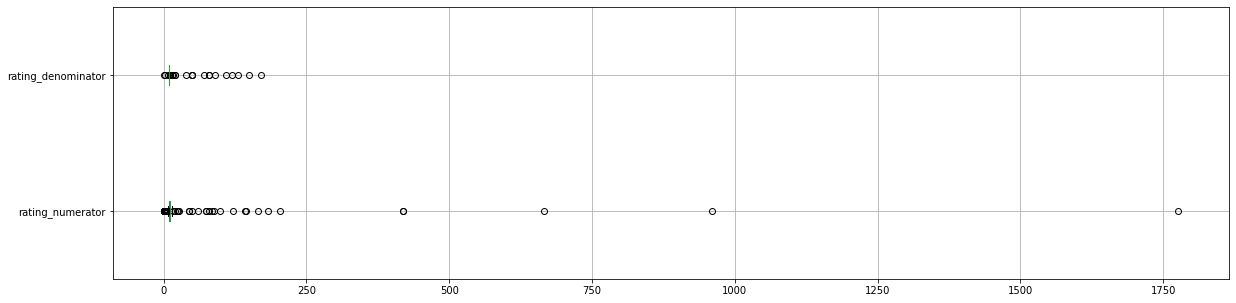

In [12]:
#exploring numerator and denominator - Visualize Outliers
archive.boxplot(column = ['rating_numerator', 'rating_denominator'], vert=False, figsize = (20, 5));

In [13]:
#assessing numerator - Numerator should ideally be up to 10
archive.rating_numerator.sort_values(ascending = False).head(30)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
Name: rating_numerator, dtype: int64

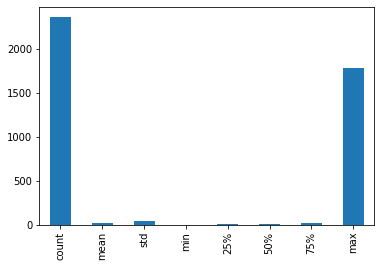

In [14]:
archive.rating_numerator.describe().plot(kind = 'bar');

In [15]:
#assessing denominator - Denominator should ideally be 10
archive.rating_denominator.sort_values(ascending = False).head(20)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
Name: rating_denominator, dtype: int64

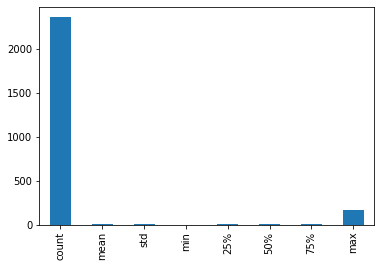

In [16]:
archive.rating_denominator.describe().plot(kind = 'bar');

In [17]:
#Count values less than 10 in the rating_denominator variable - use .count() as rating_denominator is a quantitative var
archive[archive['rating_denominator']> 10].count()

tweet_id                      20
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     20
source                        20
text                          20
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 17
rating_numerator              20
rating_denominator            20
name                          20
doggo                         20
floofer                       20
pupper                        20
puppo                         20
dtype: int64

In [18]:
#Count values less than 10 in the rating_denominator variable
archive[archive['rating_denominator']< 10].count()

tweet_id                      3
in_reply_to_status_id         1
in_reply_to_user_id           1
timestamp                     3
source                        3
text                          3
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 2
rating_numerator              3
rating_denominator            3
name                          3
doggo                         3
floofer                       3
pupper                        3
puppo                         3
dtype: int64

In [19]:
#curious to see why certain dogs scored very low - How many are they
archive[archive['rating_numerator'] < 4].count()

tweet_id                      39
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     39
source                        39
text                          39
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 36
rating_numerator              39
rating_denominator            39
name                          39
doggo                         39
floofer                       39
pupper                        39
puppo                         39
dtype: int64

In [20]:
# explore the name variable - that is a string - we use value_counts() and .describe()
print(archive.name.value_counts())
print('-----------')
print(archive.name.describe())

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Willy         1
Halo          1
Superpup      1
Claude        1
Deacon        1
Name: name, Length: 957, dtype: int64
-----------
count     2356
unique     957
top       None
freq       745
Name: name, dtype: object


In [9]:
archive.groupby('name').sum().sort_values('name', ascending = True)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
name,,,,,,,
Abby,1.491722e+18,0.0,0.0,0.000000e+00,0.000000e+00,21.0,20.0
Ace,7.532945e+17,0.0,0.0,0.000000e+00,0.000000e+00,11.0,10.0
Acro,6.740193e+17,0.0,0.0,0.000000e+00,0.000000e+00,10.0,10.0
Adele,7.059751e+17,0.0,0.0,0.000000e+00,0.000000e+00,10.0,10.0
Aiden,6.740144e+17,0.0,0.0,0.000000e+00,0.000000e+00,11.0,10.0
...,...,...,...,...,...,...,...
such,8.875171e+17,0.0,0.0,0.000000e+00,0.000000e+00,14.0,10.0
the,5.402458e+18,0.0,0.0,0.000000e+00,0.000000e+00,83.0,80.0
this,7.311560e+17,0.0,0.0,0.000000e+00,0.000000e+00,204.0,170.0


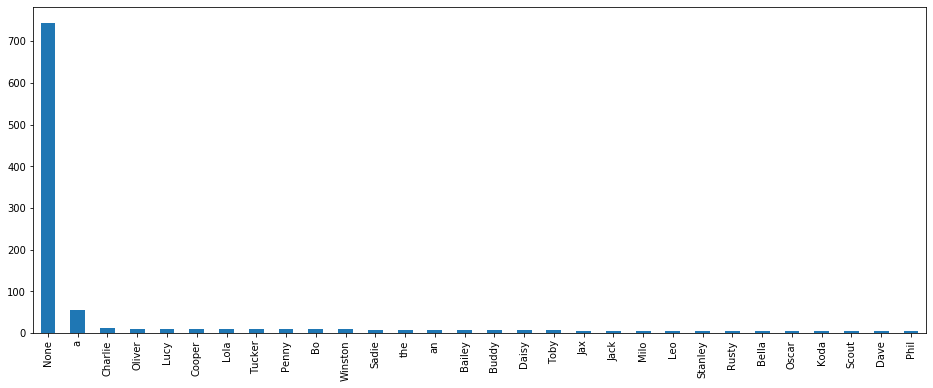

In [21]:
fig = plt.figure(figsize = (16,6))
archive.name.value_counts().head(30).plot(kind='bar');

In [22]:
# explore the 'pupper' variable - that is a string too - we use .value_counts() and .describe()
print(archive.pupper.value_counts())
print('-----------')
print(archive.pupper.describe())

None      2099
pupper     257
Name: pupper, dtype: int64
-----------
count     2356
unique       2
top       None
freq      2099
Name: pupper, dtype: object


In [23]:
# explore the 'doggo' variable - that is a string too - we use .value_counts() and .describe()
print(archive.doggo.value_counts())
print('-----------')
print(archive.doggo.describe())

None     2259
doggo      97
Name: doggo, dtype: int64
-----------
count     2356
unique       2
top       None
freq      2259
Name: doggo, dtype: object


In [24]:
# explore the 'floofer' variable - that is a string too - we use .value_counts() and .describe()
print(archive.floofer.value_counts())
print('-----------')
print(archive.floofer.describe())

None       2346
floofer      10
Name: floofer, dtype: int64
-----------
count     2356
unique       2
top       None
freq      2346
Name: floofer, dtype: object


In [25]:
# explore the 'puppo' variable - that is a string too - we use .value_counts() and .describe()
print(archive.puppo.value_counts())
print('-----------')
print(archive.puppo.describe())

None     2326
puppo      30
Name: puppo, dtype: int64
-----------
count     2356
unique       2
top       None
freq      2326
Name: puppo, dtype: object


In [26]:
#filter out doubdful data about dog maturity state
#dog / tweet id can only be associated with one category, not multiple, 
#but there is a few cases were there is some who have multiple categories like I mentioned.
archive.loc[(archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [27]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
1791,830583320585068544,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True


In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions.applymap(type).eq(str).all()

tweet_id    False
jpg_url      True
img_num     False
p1           True
p1_conf     False
p1_dog      False
p2           True
p2_conf     False
p2_dog      False
p3           True
p3_conf     False
p3_dog      False
dtype: bool

In [31]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


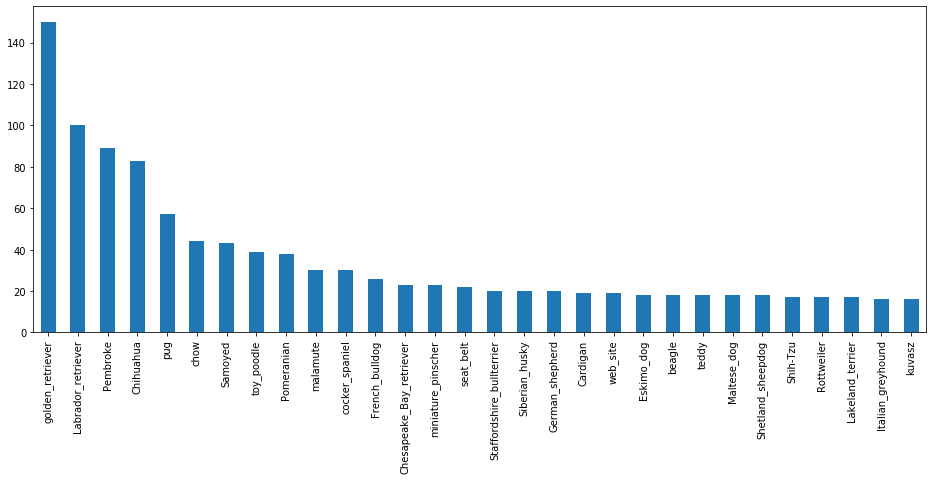

In [55]:
fig = plt.figure(figsize = (16, 6))
image_predictions.p1.value_counts().head(30).plot(kind='bar');

In [32]:
# explore the 'p1' variable - that is a string - we use .value_counts() and .describe()
print(image_predictions.p1.value_counts())
print('-----------')
print(image_predictions.p1.describe())

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
stove                    1
Scotch_terrier           1
African_hunting_dog      1
radio_telescope          1
ice_lolly                1
Name: p1, Length: 378, dtype: int64
-----------
count                 2075
unique                 378
top       golden_retriever
freq                   150
Name: p1, dtype: object


In [33]:
# explore the 'p2' variable - that is a string - we use .value_counts() and .describe()
print(image_predictions.p2.value_counts())
print('-----------')
print(image_predictions.p2.describe())

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
water_bottle            1
tarantula               1
dugong                  1
bearskin                1
hotdog                  1
Name: p2, Length: 405, dtype: int64
-----------
count                   2075
unique                   405
top       Labrador_retriever
freq                     104
Name: p2, dtype: object


In [34]:
# explore the 'p3' variable - that is a string - we use .value_counts() and .describe()
print(image_predictions.p3.value_counts())
print('-----------')
print(image_predictions.p3.describe())

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
acorn                  1
dugong                 1
boathouse              1
hand-held_computer     1
mongoose               1
Name: p3, Length: 408, dtype: int64
-----------
count                   2075
unique                   408
top       Labrador_retriever
freq                      79
Name: p3, dtype: object


In [35]:
image_predictions.groupby(['p1','p2','p3']).mean()

tweet_id  img_num  \
p1                p2                 p3                                       
Afghan_hound      Saluki             bloodhound       8.413147e+17      1.0   
                  basset             Siberian_husky   7.778850e+17      1.0   
                  borzoi             doormat          8.127511e+17      1.0   
African_crocodile American_alligator mink             6.746648e+17      1.0   
African_grey      Madagascar_cat     television       7.623165e+17      1.0   
...                                                            ...      ...   
wood_rabbit       tabby              Egyptian_cat     6.707277e+17      1.0   
wooden_spoon      sliding_door       grand_piano      8.363805e+17      1.0   
wool              fur_coat           kuvasz           7.032685e+17      1.0   
                  siamang            gorilla          6.704742e+17      1.0   
zebra             tiger              prairie_chicken  6.713902e+17      1.0   

                                                       p1_conf  p1_dog  \
p1                p2                 p3                                  
Afghan_hound      Saluki             bloodhound       0.903712    True   
                  basset             Siberian_husky   0.123529    True   
                  borzoi             doormat          0.274637    True   
African_crocodile American_alligator mink             0.330625   False   
African_grey      Madagascar_cat     television       0.270468   False   
...                                                        ...     ...   
wood_rabbit       tabby              Egyptian_cat     0.368562   False   
wooden_spoon      sliding_door       grand_piano      0.082489   False   
wool              fur_coat           kuvasz           0.525434   False   
                  siamang            gorilla          0.070076   False   
zebra             tiger              prairie_chicken  0.997673   False   

                                                       p2_conf  p2_dog  \
p1                p2                 p3                                  
Afghan_hound      Saluki             bloodhound       0.035215    True   
                  basset             Siberian_husky   0.119682    True   
                  borzoi             doormat          0.142204    True   
African_crocodile American_alligator mink             0.075356   False   
African_grey      Madagascar_cat     television       0.076187   False   
...                                                        ...     ...   
wood_rabbit       tabby              Egyptian_cat     0.309675   False   
wooden_spoon      sliding_door       grand_piano      0.061017   False   
wool              fur_coat           kuvasz           0.236391   False   
                  siamang            gorilla          0.062536   False   
zebra             tiger              prairie_chicken  0.000837   False   

                                                       p3_conf  p3_dog  
p1                p2                 p3                                 
Afghan_hound      Saluki             bloodhound       0.026565    True  
                  basset             Siberian_husky   0.108709    True  
                  borzoi             doormat          0.109677   False  
African_crocodile American_alligator mink             0.057481   False  
African_grey      Madagascar_cat     television       0.033306   False  
...                                                        ...     ...  
wood_rabbit       tabby              Egyptian_cat     0.154914   False  
wooden_spoon      sliding_door       grand_piano      0.055086   False  
wool              fur_coat           kuvasz           0.038243    True  
                  siamang            gorilla          0.058894   False  
zebra             tiger              prairie_chicken  0.000575   False  

[1742 rows x 8 columns]

In [6]:
type(image_predictions.groupby(['p1','p2','p3'])['p1_conf'])

pandas.core.groupby.generic.SeriesGroupBy

In [20]:
image_predictions.groupby(['p1','p2','p3'])['p1_conf'].apply(lambda x: x.sort_values())

p1                 p2                  p3                   
Afghan_hound       Saluki              bloodhound       1855    0.903712
                   basset              Siberian_husky   1458    0.123529
                   borzoi              doormat          1561    0.274637
                                                        1804    0.274637
African_crocodile  American_alligator  mink             446     0.330625
                                                                  ...   
wood_rabbit        tabby               Egyptian_cat     253     0.368562
wooden_spoon       sliding_door        grand_piano      1831    0.082489
wool               fur_coat            kuvasz           932     0.525434
                   siamang             gorilla          246     0.070076
zebra              tiger               prairie_chicken  297     0.997673
Name: p1_conf, Length: 2075, dtype: float64

In [36]:
tweet_original.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [37]:
tweet_original.sample(3)

,id,retweet_count,favorite_count
15,889278841981685760,5637,25652
172,858471635011153920,5271,22640
343,832032802820481025,4746,13887


In [38]:
tweet_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


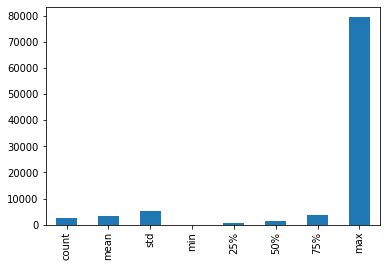

In [39]:
# explore the 'retweet_count' variable - that is an integer - we use .describe()
tweet_original.retweet_count.describe().plot(kind = 'bar');

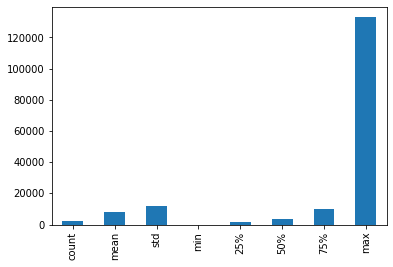

In [40]:
# explore the 'favorite_count' variable - that is an integer - we use .describe()
tweet_original.favorite_count.describe().plot(kind = 'bar');

In [41]:
#Final check on the datasets is the duplicates
print("Check duplicates in David's archive: {}".format(archive.duplicated().sum()))
print('Duplicates in image_predictions df: {}'.format(image_predictions.duplicated().sum()))
print('Duplicates in tweet_original df: {}'.format(tweet_original.duplicated().sum()))

Check duplicates in David's archive: 0
Duplicates in image_predictions df: 0
Duplicates in tweet_original df: 0


#### PART II: Findings

##### Quality Issues

* Work only with dog records and remove all rows that are not dogs.
* Every time a tweet is being retweeted a new tweetID is created. This means that *retweeted_status_id*,    *retweeted_status_user_id* and *retweeted_status_timestamp* carry dupplicated data hence we need to drop these records. *in_reply_to_status_id*, *in_reply_to_user_id* all have a majority of null data, also the source column not needed.
* *rating_numerator*, *rating_denominator* have to be further elaborated before analysis. The numerator reaches values as high as 1776 that exceeds maximum value thet is set to be 10. The danominator feature has to be also elaborated as there are attributes that exceed 10 that should be the limit.
* The *names* feature holds invalid vaues in some attributes. These velues can be found if we looked up as they start with a lower case letter. These namings should be replaced with a more appropriate description as 'None'.
* Tweet Date values in incorrect data format


##### Tidiness Issues

1. There should be only one dataframe (as stated in the project outline).
2. There are multiple dog stages columns should be merged into one column 'stage'.

# 3. Clean Data

This is the place you can touch data. Based on the notes you have taken during the assesment stage before

### Shortcut to load data

In [2]:
#run this cell to read all our three data sources into three separate dataframes
archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
json_data = [json.loads(line) for line in open('tweet-json.txt', 'r')] #this is a list
tweet_original = pd.DataFrame(json_data, columns = ['id', 'retweet_count','favorite_count']) #this is a DataFrame

### Making a copy
The very first thing to do before any cleaning occurs is to make a copy of each piece of data. All of the cleaning operations will be conducted on this copy so you can still view the original dirty and/or messy dataset later.

In [3]:
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_original_clean = tweet_original.copy()

In [4]:
tweet_original_clean.index

RangeIndex(start=0, stop=2354, step=1)

### Create a Unique Datarame using two different methods 

In [5]:
#create unique dataframe using join()
#Here we do not have to rename id column name of the "tweet_original_clean" dataframe
df = archive_clean.set_index('tweet_id').join(tweet_original_clean.set_index('id'), lsuffix='_basic', rsuffix='_extended') 
df = df.join(image_predictions_clean.set_index('tweet_id'), lsuffix='', rsuffix='_breed') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [6]:
#rename column name to be able to perform merge function
tweet_original_clean.rename(columns = {"id": 'tweet_id'}, inplace = True)

In [7]:
#create unique dataframe using merge(). For merge() function to be succesful we have renamed "id" column 
#of the tweet_original_cean data frame to "tweet_id"
df_merge = pd.merge(archive_clean, image_predictions_clean, how='inner', on='tweet_id').set_index('tweet_id')
df_merge = pd.merge(df_merge, tweet_original_clean, how = 'inner', on='tweet_id' ).set_index('tweet_id')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       23 non-null     float64
 1   in_reply_to_user_id         23 non-null     float64
 2   timestamp                   2073 non-null   object 
 3   source                      2073 non-null   object 
 4   text                        2073 non-null   object 
 5   retweeted_status_id         79 non-null     float64
 6   retweeted_status_user_id    79 non-null     float64
 7   retweeted_status_timestamp  79 non-null     object 
 8   expanded_urls               2073 non-null   object 
 9   rating_numerator            2073 non-null   int64  
 10  rating_denominator          2073 non-null   int64  
 11  name                        2073 non-null   object 
 12  doggo                       2073 non-null   object 
 13  fl

In [8]:
print('df_merge has {} records'.format(df_merge.shape[0]))
print('df has {} records'.format(df.shape[0]))
print('df_merge has {} retweet records'.format(df_merge.retweeted_status_id.count()))
print('df has {} retweet records'.format(df.retweeted_status_id.count()))

df_merge has 2073 records
df has 2356 records
df_merge has 79 retweet records
df has 181 retweet records


### Explore and drop retweet information both rows and columns as it complicates our decisions

In [9]:
#explore retweet id's using merge and join functions
rt_condition_join = (df.retweeted_status_id.isnull() == False) | (df.retweeted_status_user_id.isnull() == False) | (df.retweeted_status_timestamp.isnull() == False)
rt_condition_merge = (df_merge.retweeted_status_id.isnull() == False) | (df_merge.retweeted_status_user_id.isnull() == False) | (df_merge.retweeted_status_timestamp.isnull() == False)
print(len(df[rt_condition_join]))
print(len(df_merge[rt_condition_merge]))

181
79


In [10]:
len([rt for rt in df[rt_condition_join].index if rt not in df_merge[rt_condition_merge].index])

102

In [11]:
#Let's check out just one of them to see waht it looks like
df.loc[888202515573088257]

in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-21 01:02:36 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Canela. She attempted s...
retweeted_status_id                                                 8.87474e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2017-07-19 00:47:34 +0000
expanded_urls                 https://twitter.com/dog_rates/status/887473957...
rating_numerator                                                             13
rating_denominator                                                           10
name                                                                     Canela
doggo                                   

In [12]:
#which are the retweets that exist in the join dataframe 'df' but not in the merge_df 'merge_df'
merge_missing_indexes = [rt for rt in df[rt_condition_join].index if rt not in df_merge[rt_condition_merge].index]

In [13]:
merge_missing_rt_df = pd.DataFrame()
for item in merge_missing_indexes:
    #print(item)
    #print(df.loc[item])
    merge_missing_rt_df = merge_missing_rt_df.append(df.loc[item])
merge_missing_rt_df.head()

,doggo,expanded_urls,favorite_count,floofer,img_num,in_reply_to_status_id,in_reply_to_user_id,jpg_url,name,p1,...,puppo,rating_denominator,rating_numerator,retweet_count,retweeted_status_id,retweeted_status_timestamp,retweeted_status_user_id,source,text,timestamp
888202515573088257,None,https://twitter.com/dog_rates/status/887473957...,NaN,None,2.0,NaN,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,Canela,Pembroke,...,None,10.0,13.0,NaN,8.874740e+17,2017-07-19 00:47:34 +0000,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,2017-07-21 01:02:36 +0000
886054160059072513,None,https://twitter.com/dog_rates/status/886053434...,0.0,None,NaN,NaN,NaN,NaN,None,NaN,...,None,10.0,12.0,108.0,8.860537e+17,2017-07-15 02:44:07 +0000,1.960740e+07,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,2017-07-15 02:45:48 +0000
879130579576475649,None,https://twitter.com/dog_rates/status/878057613...,0.0,None,NaN,NaN,NaN,NaN,Emmy,NaN,...,None,10.0,14.0,7181.0,8.780576e+17,2017-06-23 01:10:23 +0000,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,2017-06-26 00:13:58 +0000
878404777348136964,None,"https://www.gofundme.com/3yd6y1c,https://twitt...",0.0,None,NaN,NaN,NaN,NaN,Shadow,NaN,...,None,10.0,13.0,1349.0,8.782815e+17,2017-06-23 16:00:04 +0000,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,2017-06-24 00:09:53 +0000
878316110768087041,None,https://twitter.com/dog_rates/status/669000397...,0.0,None,NaN,NaN,NaN,NaN,Terrance,NaN,...,None,10.0,11.0,6965.0,6.690004e+17,2015-11-24 03:51:38 +0000,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,2017-06-23 18:17:33 +0000


>So far elaboration,has been just to better understand how to handle information. We will be using df dataframe and not df_merge dataframe so let's drop those retweeted reccords.

In [14]:
retweets_to_drop = [rt_index for rt_index in df[(df.retweeted_status_id.isnull() == False)].index]
df.drop(retweets_to_drop, axis = 0, inplace = True)

### Keep OnlyDog reccords in our dataFrame  and Columns we are only interested in

In [15]:
#create filters aka "masks" to be used in the df dataframe collect the dog category
dog = ((df.p1_dog == True) | (df.p2_dog == True) | (df.p3_dog == True)) #dog is the filer we apply to our dataframe
dog_not = ((df.p1_dog == False) | (df.p2_dog == False) | (df.p3_dog == False))
#create the dataframe to elaborate
df = df.loc[dog, ['timestamp', 'rating_numerator','rating_denominator','p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf', 'name', 'retweet_count', 'favorite_count', 'doggo', 'floofer', 'pupper', 'puppo']]


### Create the breeds column for the dogs we have in our DataFrame

In [16]:
def get_breed_list(df):
    '''
    Gets the initial DataFrame and creates a column with breeds information for every record
    '''
    breeds_list = []
    for column in df.iloc[:, 3:6]:
        for element in df[column].unique():
            if element not in breeds_list:
                breeds_list.append(element)
    breeds_list = [element.lower().capitalize().replace('-','_') for element in breeds_list] #homogenize 
    
    for c in df.iloc[:, 3:6]:
        df[c] = df[c].apply(lambda x: x.lower().capitalize().replace('-','_')) #homogenize
    
    return df, breeds_list
get_breed_list(df)
df.head()

,timestamp,rating_numerator,rating_denominator,p1,p2,p3,p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf,name,retweet_count,favorite_count,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27 +0000,13,10,Chihuahua,Pekinese,Papillon,True,True,True,0.323581,0.090647,0.068957,Tilly,6514.0,33819.0,None,None,None,None
891815181378084864,2017-07-31 00:18:03 +0000,12,10,Chihuahua,Malamute,Kelpie,True,True,True,0.716012,0.078253,0.031379,Archie,4328.0,25461.0,None,None,None,None
891689557279858688,2017-07-30 15:58:51 +0000,13,10,Paper_towel,Labrador_retriever,Spatula,False,True,False,0.170278,0.168086,0.040836,Darla,8964.0,42908.0,None,None,None,None
891327558926688256,2017-07-29 16:00:24 +0000,12,10,Basset,English_springer,German_short_haired_pointer,True,True,True,0.555712,0.225770,0.175219,Franklin,9774.0,41048.0,None,None,None,None
891087950875897856,2017-07-29 00:08:17 +0000,13,10,Chesapeake_bay_retriever,Irish_terrier,Indian_elephant,True,True,False,0.425595,0.116317,0.076902,None,3261.0,20562.0,None,None,None,None


In [17]:
breed = [] 
confidence = [] 
#define function 
#Append values to lists above if conditons are met 
def get_breed_and_conf(row): 
    '''
    Function to be applied to a dataframe.
    Creates two LISTS -breed and confidence- 
    given dataframe's conditions
    '''
    if row['p1_dog'] == True: 
        breed.append(row['p1']) 
        confidence.append(row['p1_conf']) 
    elif row['p2_dog'] == True: 
        breed.append(row['p2']) 
        confidence.append(row['p2_conf']) 
    elif row['p3_dog'] == True: 
        breed.append(row['p3']) 
        confidence.append(row['p3_conf']) 
    else: 
        breed.append('Not identified') 
        confidence.append(np.nan)
        
        
#Apply the function in the master df
df.apply(get_breed_and_conf, axis=1)

#create new column pandas Series from the beed list and confidence list created above
df['breed'] = breed #get lists and creates df's series
df['confidence'] = confidence


In [18]:
#drop p1_dog p2_dog p3_dog
df = df.drop(['p1_dog', 'p2_dog', 'p3_dog', 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf' ], axis = 1)
df

,timestamp,rating_numerator,rating_denominator,name,retweet_count,favorite_count,doggo,floofer,pupper,puppo,breed,confidence
tweet_id,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,6514.0,33819.0,None,None,None,None,Chihuahua,0.323581
891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,4328.0,25461.0,None,None,None,None,Chihuahua,0.716012
891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,8964.0,42908.0,None,None,None,None,Labrador_retriever,0.168086
891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,9774.0,41048.0,None,None,None,None,Basset,0.555712
891087950875897856,2017-07-29 00:08:17 +0000,13,10,None,3261.0,20562.0,None,None,None,None,Chesapeake_bay_retriever,0.425595
...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50 +0000,5,10,None,41.0,111.0,None,None,None,None,Miniature_pinscher,0.560311
666044226329800704,2015-11-16 00:04:52 +0000,6,10,a,147.0,311.0,None,None,None,None,Rhodesian_ridgeback,0.408143
666033412701032449,2015-11-15 23:21:54 +0000,9,10,a,47.0,128.0,None,None,None,None,German_shepherd,0.596461


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 892177421306343426 to 666020888022790149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1686 non-null   object 
 1   rating_numerator    1686 non-null   int64  
 2   rating_denominator  1686 non-null   int64  
 3   name                1686 non-null   object 
 4   retweet_count       1686 non-null   float64
 5   favorite_count      1686 non-null   float64
 6   doggo               1686 non-null   object 
 7   floofer             1686 non-null   object 
 8   pupper              1686 non-null   object 
 9   puppo               1686 non-null   object 
 10  breed               1686 non-null   object 
 11  confidence          1686 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 171.2+ KB


<ipython-input-20-8e49e6363cf9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d = df.groupby('breed')['retweet_count', 'favorite_count'].sum()


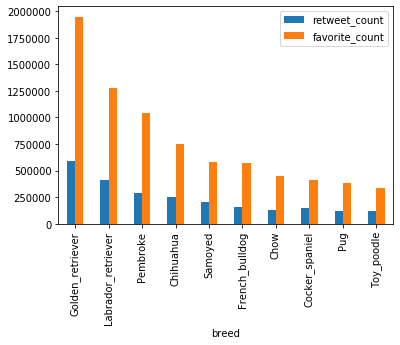

In [20]:
#visualize the most popular breeds
d = df.groupby('breed')['retweet_count', 'favorite_count'].sum()
d = d.sort_values(['favorite_count', 'retweet_count'], ascending = False)
d.head(10).plot(kind='bar')

<ipython-input-21-32fbc05dbf8b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d = df.groupby('breed')['retweet_count', 'favorite_count'].sum()


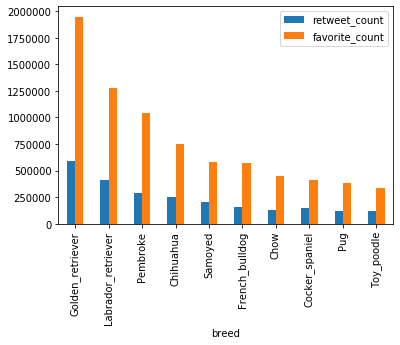

In [21]:
#another way to visualize popular breeds
d = df.groupby('breed')['retweet_count', 'favorite_count'].sum()
d = d.sort_values(['favorite_count', 'retweet_count'], ascending = False)
d.iloc[0:10, :].plot(kind = 'bar');

In [22]:
df.columns

Index(['timestamp', 'rating_numerator', 'rating_denominator', 'name',
       'retweet_count', 'favorite_count', 'doggo', 'floofer', 'pupper',
       'puppo', 'breed', 'confidence'],
      dtype='object')

### Create the dog_stage colums keeping track of dog maturity
According to the Dog Dictionary Floofer is not a dog maturity stage so we do not concider it into our non consistent records 

In [23]:
#create a filter for invalid dog_stage filter records and drop them
dog_stage_filter = ((df.doggo == 'doggo') & (df.pupper == 'pupper')) | ((df.doggo == 'doggo') & (df.puppo == 'puppo'))|((df.doggo == 'doggo') & (df.puppo == 'puppo')) | ((df.doggo == 'doggo') & (df.pupper == 'pupper') & (df.doggo == 'doggo'))|((df.doggo == 'doggo') & (df.floofer == 'floofer'))
dog_stage_idx_to_dorp = df[dog_stage_filter].index
df.drop(dog_stage_idx_to_dorp, axis = 0, inplace = True)

In [24]:
#Another way to do the samee thing concidering floofer as a dog stage
#Identify rows where more that one >1 of the dog stage columns does not have None as a value 
multiple = df.loc[(df[['doggo', 'pupper', 'floofer', 'puppo']] != 'None').sum(axis=1) > 1] 
list(multiple.index) 
excluded_index = list(multiple.index)

In [25]:
#Handle None values
df.doggo.value_counts(), df.floofer.value_counts(), df.pupper.value_counts(), df.puppo.value_counts()

(None     1622
 doggo      54
 Name: doggo, dtype: int64,
 None       1669
 floofer       7
 Name: floofer, dtype: int64,
 None      1508
 pupper     168
 Name: pupper, dtype: int64,
 None     1655
 puppo      21
 Name: puppo, dtype: int64)

In [26]:
#check column index
tuple(col for col in enumerate(df.columns))

((0, 'timestamp'),
 (1, 'rating_numerator'),
 (2, 'rating_denominator'),
 (3, 'name'),
 (4, 'retweet_count'),
 (5, 'favorite_count'),
 (6, 'doggo'),
 (7, 'floofer'),
 (8, 'pupper'),
 (9, 'puppo'),
 (10, 'breed'),
 (11, 'confidence'))

In [27]:
df.head(3)

,timestamp,rating_numerator,rating_denominator,name,retweet_count,favorite_count,doggo,floofer,pupper,puppo,breed,confidence
tweet_id,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,6514.0,33819.0,None,None,None,None,Chihuahua,0.323581
891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,4328.0,25461.0,None,None,None,None,Chihuahua,0.716012
891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,8964.0,42908.0,None,None,None,None,Labrador_retriever,0.168086


In [28]:
#replace None with '', that is NaN which is diffrent to None in our "doggo", "floofer", "pupper", "puppo" columns
df[['doggo', 'floofer', 'pupper', 'puppo']] = df[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [29]:
#create 'dog_stage' column and Join all those empty values from "doggo", "floofer", "pupper", "puppo" columns
df['dog_stage'] = df[df.columns[6:10]].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)
df['dog_stage'] = df['dog_stage'].replace(r'^\s*$' , np.nan, regex=True)
df['dog_stage'] = df['dog_stage'].replace(np.nan , 'no_stage' , regex=True)

In [30]:
df.dog_stage.value_counts()

no_stage    1426
pupper       168
doggo         54
puppo         21
floofer        7
Name: dog_stage, dtype: int64

In [31]:
#drop unecessary columns now we have dog_stage
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [32]:
#create a categorical variable datatype
df['dog_stage'] = df.dog_stage.astype('category')

In [33]:
#check out dog stage value counts
df['dog_stage'].value_counts()

no_stage    1426
pupper       168
doggo         54
puppo         21
floofer        7
Name: dog_stage, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 892177421306343426 to 666020888022790149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   timestamp           1676 non-null   object  
 1   rating_numerator    1676 non-null   int64   
 2   rating_denominator  1676 non-null   int64   
 3   name                1676 non-null   object  
 4   retweet_count       1676 non-null   float64 
 5   favorite_count      1676 non-null   float64 
 6   breed               1676 non-null   object  
 7   confidence          1676 non-null   float64 
 8   dog_stage           1676 non-null   category
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 119.7+ KB


<ipython-input-35-6a604fc892c6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d = df.groupby('dog_stage')['retweet_count', 'favorite_count'].sum()


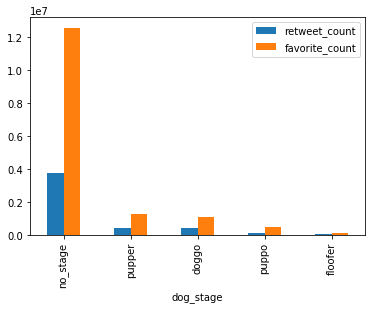

In [35]:
#check out which category is most popular
d = df.groupby('dog_stage')['retweet_count', 'favorite_count'].sum()
d = d.sort_values(['favorite_count', 'retweet_count'], ascending = False)
d.plot(kind = 'bar');

In [36]:
df.name.value_counts()

None       413
a           46
Cooper      10
Lucy        10
Charlie     10
          ... 
Brownie      1
Kawhi        1
Sky          1
Rupert       1
Kaia         1
Name: name, Length: 850, dtype: int64

In [37]:
df['name'] = df['name'].replace('None' , '')

In [38]:
df['name'] = df['name'].replace(['', 'a', 'the'] , 'no_name')

In [39]:
df['name'].value_counts()

no_name    466
Lucy        10
Cooper      10
Charlie     10
Tucker       9
          ... 
Emmy         1
Brownie      1
Kawhi        1
Sky          1
Kaia         1
Name: name, Length: 848, dtype: int64

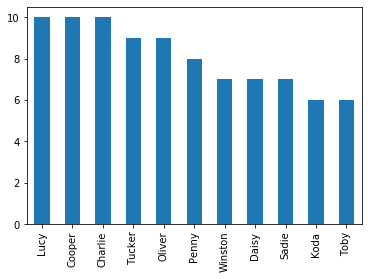

In [40]:
#another way to visualize popular breeds
df['name'].value_counts().iloc[1:12].plot(kind='bar');

In [41]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 892177421306343426 to 666020888022790149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           1676 non-null   datetime64[ns, UTC]
 1   rating_numerator    1676 non-null   int64              
 2   rating_denominator  1676 non-null   int64              
 3   name                1676 non-null   object             
 4   retweet_count       1676 non-null   float64            
 5   favorite_count      1676 non-null   float64            
 6   breed               1676 non-null   object             
 7   confidence          1676 non-null   float64            
 8   dog_stage           1676 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(3), int64(2), object(2)
memory usage: 119.7+ KB
